# Video Game And The ESRB Rating System Analysis Using Random Forests

# 1) What is ESRB rating?

"ESRB ratings provide information about what’s in a game or app so parents and consumers can make informed choices about which games are right for their family. Ratings have 3 parts: Rating Categories, Content Descriptors, and Interactive Elements." [-ESRB.ORG](https://www.esrb.org/)


The Entertainment Software Rating Board (ESRB) is an American self-regulatory organization that assigns age and content ratings to consumer video games. The board assigns ratings to games based on their content, using judgment similar to the motion picture rating systems used in many countries, using a combination of six age-based levels intended to aid consumers in determining a game's content and suitability, along with a system of "content descriptors" which detail specific types of content present in a particular game. The ratings are determined by a combination of material provided by the game's publisher in both questionnaires and video footage of the game, and a review of this material by a panel of reviewers who assign it a rating. The ratings are designed towards parents so they can make informed decisions about purchasing games for their children. Once a game is rated, the ESRB maintains a code of ethics for the advertising and promotion of video games - ensuring that marketing materials for games are targeted to appropriate audiences. (https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)



# 2) Import data and libraries.

* Loaded needed libraries 
* Pandas = data analysis
* NumPy = computing
* Matplotlib = plotting data
* Seaborn = styling



In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
# load data
# Common loading errors can be '\' leading to a unicode syntax error. Use \\ or /
# When searching for a folder:
main_data = pd.read_csv("C:/Users/Absinthe/Documents/GitHub/Jupyter/ESRB/Video_games_esrb_rating.CSV")

# When inside same folder: 
# main_data = pd.read_csv("Video_games_esrb_rating.CSV")

# 3) EDA On Data

Good to check head of dataframe and list of columns.

In [66]:
# Fast looking (size of dataframe, columns, 5 first rows of data, Nan values)
# Convert numeric to string to concat

print("The dataset has: " + str(main_data.shape[0]) + " rows.")
print("Along with, " + str(main_data.shape[1]) + " columns.")

print('\n----------------------------------------\n')
print("List of columns: ") 
print(main_data.columns)



The dataset has: 1895 rows.
Along with, 34 columns.

----------------------------------------

List of columns: 
Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')


In [67]:
#See the columns as a spreadsheet
main_data.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Here we can see that this dataframe has 1895 rows and 34 columns and there are a lot of features. 

For example, blood_and_gore, intense_violence and others. 

We can see that all of those columns include numbers: 0 and 1. 

Author of this dataset explains that: 

* 0 means there is NO feature in that game
* 1 means there is a feature

Also, there is a column called, “Console”. This column is about the console on which the game was released. It includes numbers 0 and 1 too. 

But it means that: 
* 0 = PS4 
* 1 = PS4 & Xbox_one

## Checking For Null Values
A very important part in data analysis, is cleaning data. You must decide what to do with "Null Values."
* We found that there are no null values, the dataset was clean from the start
* We are using floating point numbers

In [68]:
percent_of_null = main_data.isnull().sum() / main_data.shape[0]
print(percent_of_null)

print("\n----------------------------------------------------\n")

percent_of_nan = main_data.isna().sum() / main_data.shape[0]
print(percent_of_nan)

title                       0.0
console                     0.0
alcohol_reference           0.0
animated_blood              0.0
blood                       0.0
blood_and_gore              0.0
cartoon_violence            0.0
crude_humor                 0.0
drug_reference              0.0
fantasy_violence            0.0
intense_violence            0.0
language                    0.0
lyrics                      0.0
mature_humor                0.0
mild_blood                  0.0
mild_cartoon_violence       0.0
mild_fantasy_violence       0.0
mild_language               0.0
mild_lyrics                 0.0
mild_suggestive_themes      0.0
mild_violence               0.0
no_descriptors              0.0
nudity                      0.0
partial_nudity              0.0
sexual_content              0.0
sexual_themes               0.0
simulated_gambling          0.0
strong_janguage             0.0
strong_sexual_content       0.0
suggestive_themes           0.0
use_of_alcohol              0.0
use_of_d

# 4) Visualizing data.

A great way to explore data is go in ascending column order (begins with the least or smallest and ends with the greatest). 

So, let’s start. 

First column is Name, which isn't a usable data type, we can't visualize names. 

Second column is about consoles. It's a numeric, so, we can visualize. 

([<matplotlib.patches.Wedge at 0x1f6e60f8d30>,
 [Text(-0.08471423906438455, 1.0967331023087352, 'Games on PS4'),
  Text(0.08471434174794724, -1.096733094377211, 'Games on both consoles')])

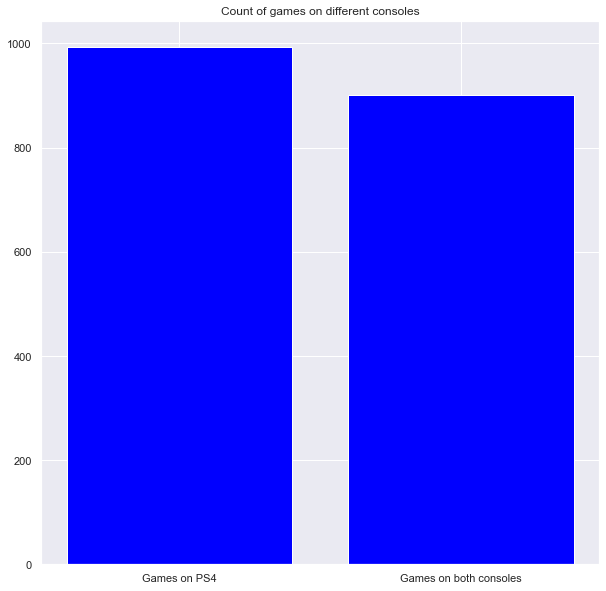

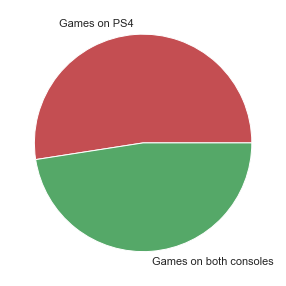

In [69]:
# size
plt.figure(figsize=(10, 10))

# pie and bar graphs

#Labels used for Graphs:
consoles_labels = ["Games on PS4", "Games on both consoles"]

#Using the length (size) of entries of the columns, match INDEX to your labels
consoles_names = [len(playstation), len(both_consoles)]

playstation = main_data[main_data["console"] == 0]
both_consoles = main_data[main_data["console"] == 1]


# Bar chart
#Title will appear for both graphs
plt.title("Count of games on different consoles")
plt.bar(consoles_labels, consoles_names, color = "blue")


# Pie Chart
# plt.title("Count of games on different consoles")
plt.figure(figsize=(20, 5))
plt.pie(consoles_names, labels = consoles_labels, shadow = False, colors = "rgbyc")


Here we can see that:

• About 900 games shared on BOTH PLATFORMS

• About 1000 games total on PS4

• The ratio of PlayStation games to games on both platforms is approximately 51% to 49%.



We will use Pearson`s Correlation to see correlation between all columns

<AxesSubplot:>

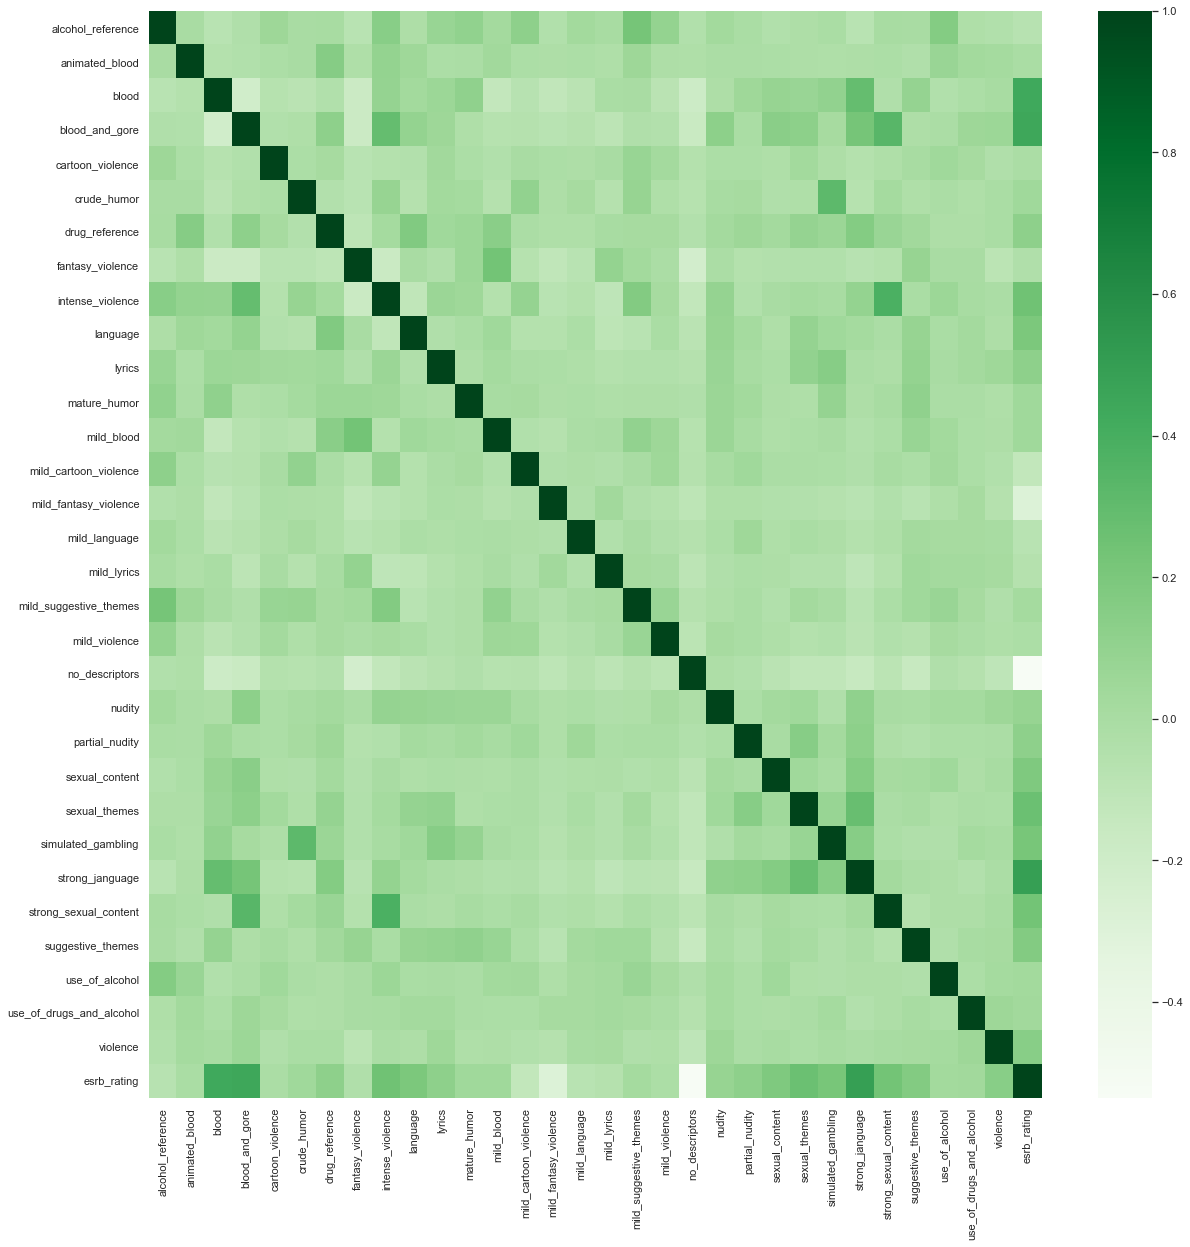

In [70]:
# correlation
# size
plt.figure(figsize=(20, 20))

useless_cols = ["title", "console"] 
corr_data = main_data.drop(useless_cols, axis = 1)

encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

corr_data["esrb_rating"] = corr_data["esrb_rating"].map(encode)

corr_cols = list(corr_data.columns)

main_correlation = corr_data[corr_cols].corr()
sns.heatmap(main_correlation, annot = False, cmap = "Greens")

# The dark diagonal line is a 1:1 correlation to itself
# We don't see a strong correction with many columns
    # But we do see a correlation with: blood, blood_and_gore, sexual language, crude humor, language to ESRB

Here we can see that:

• Columns like Blood, Blood and Gore, Strong Language have strong positive correlation with ESRB rating.

• But nudity, use of drugs and alcohol have really low correlation.

Well, we find out which feature columns are important, so we can visualize them. 
Let`s start from Blood column:

Text(0.5, 1.0, 'Is there blood?')

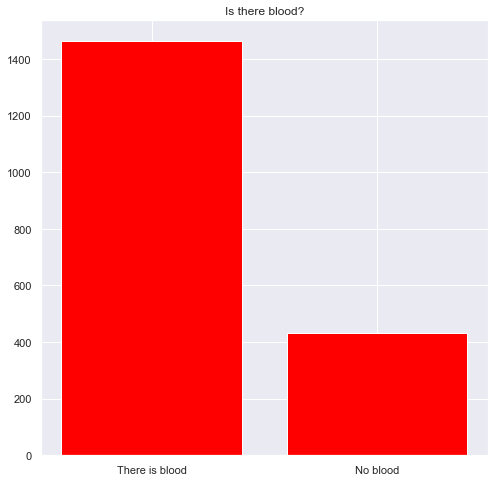

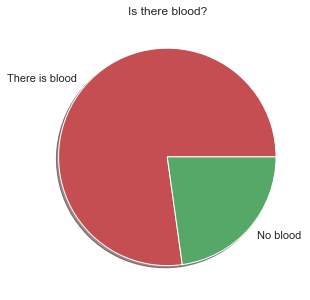

In [71]:
# about blood in video games
plt.figure(figsize=(8, 8))
blood_labels = ["There is blood", "No blood"]

blood_0 = main_data[main_data["blood"] == 0]
blood_1 = main_data[main_data["blood"] == 1]

blood_names = [len(blood_0), len(blood_1)]

plt.bar(blood_labels, blood_names, color = "red")
plt.title("Is there blood?")

plt.figure(figsize=(19, 5))
plt.pie(blood_names, labels = blood_labels, shadow = True, colors = "rgbyc")
plt.title("Is there blood?")

Here we can see that:

• There are more games with blood scenes than without it.

• There are more than 1400 computer games with blood scenes in this dataframe.

Blood and Gore:

([<matplotlib.patches.Wedge at 0x1f6e5771f10>,
 [Text(-1.014778174272285, 0.4245294536549944, 'There is blood and gore'),
  Text(1.0147781345249645, -0.42452954866538267, 'No blood and gore')])

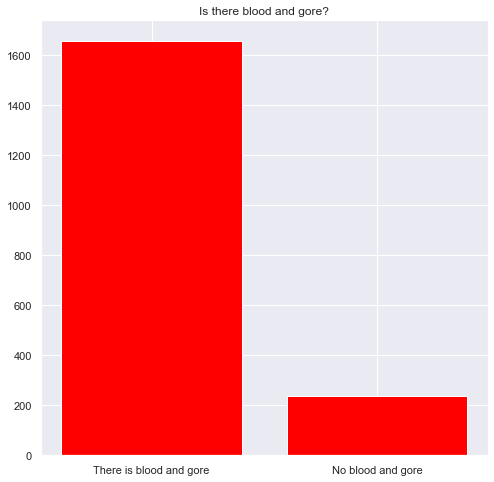

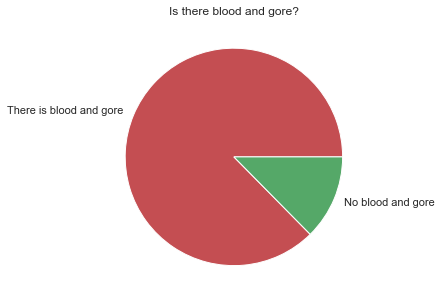

In [72]:
# blood and gore column
# size
plt.figure(figsize=(8, 8))
blood_and_gore_labels = ["There is blood and gore", "No blood and gore"]

blood_and_gore_0 = main_data[main_data["blood_and_gore"] == 0]
blood_and_gore_1 = main_data[main_data["blood_and_gore"] == 1]

blood_and_gore_names = [len(blood_and_gore_0), len(blood_and_gore_1)]

plt.title("Is there blood and gore?")
plt.bar(blood_and_gore_labels, blood_and_gore_names, color = "red")


plt.figure(figsize=(19, 5))
plt.title("Is there blood and gore?")
plt.pie(blood_and_gore_names, labels = blood_and_gore_labels,  colors = "rgbyc")


Here we can see that:

• There are more games with blood and gore scenes than without it.

• There are more than 1600 computer games with blood and gore scenes in this data frame.



## Now for Strong Language:

Text(0.5, 1.0, 'Is there strong language?')

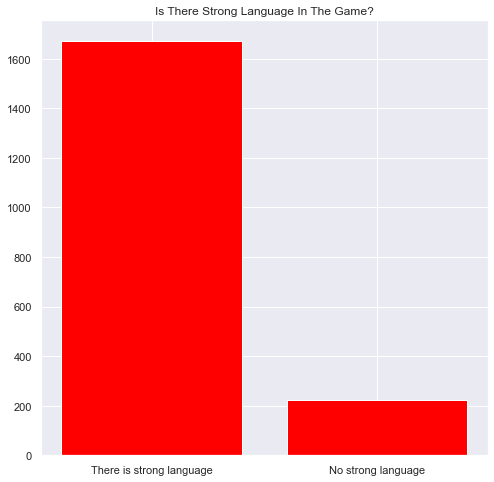

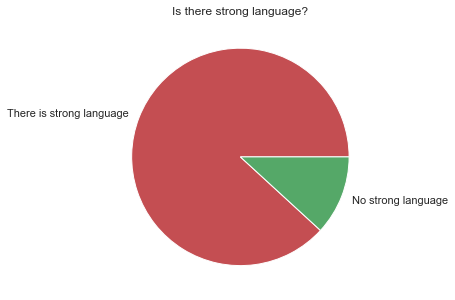

In [94]:
# about strong language
# size
plt.figure(figsize=(8, 8))
strong_lg_labels = ["There is strong language", "No strong language"]

strong_lg_0 = main_data[main_data["strong_janguage"] == 0]
strong_lg_1 = main_data[main_data["strong_janguage"] == 1]

strong_lg_names = [len(strong_lg_0), len(strong_lg_1)]

plt.bar(strong_lg_labels, strong_lg_names, color = "red")
plt.title("Is There Strong Language In The Game?")

plt.figure(figsize=(20, 5))
plt.pie(strong_lg_names, labels = strong_lg_labels, shadow = False, colors = "rgbyc")
plt.title("Is there strong language?")

Here we can see that:

• There are more games with strong language scenes than without it.

• There are more than 1600 computer games with strong language scenes in this data frame.



# Rating

We can see that there are only 4 unique values. E, M, T, ET. That`s why we will use lists only for these four values.

Text(0.5, 1.0, 'Rating distribution')

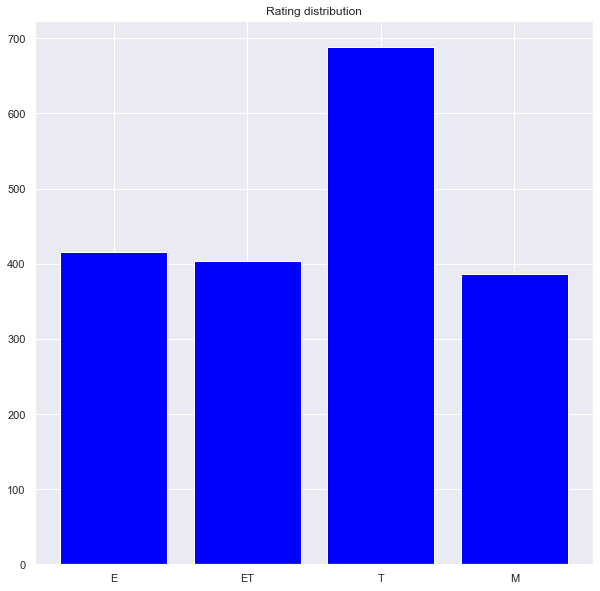

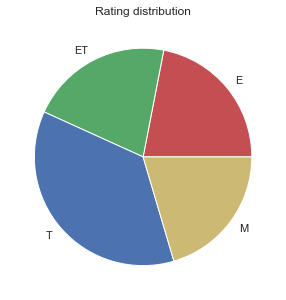

In [93]:
# ratings
# size
plt.figure(figsize=(10, 10))
rating_labels = ["E", "ET", "T", "M"]

E_rating = main_data[main_data["esrb_rating"] == "E"]
ET_rating = main_data[main_data["esrb_rating"] == "ET"]
T_rating = main_data[main_data["esrb_rating"] == "T"]
M_rating = main_data[main_data["esrb_rating"] == "M"]

rating_names = [len(E_rating), len(ET_rating), len(T_rating), len(M_rating)]

plt.bar(rating_labels, rating_names, color = "blue")
plt.title("Rating distribution")

plt.figure(figsize=(20, 5))
plt.pie(rating_names, labels = rating_labels, shadow = False, colors = "rgbyc")
plt.title("Rating distribution")

Here we can see that:

* There are a lot of games with rating T, but not so many games with rating M and ET.

* There are many games with blood and suggestive themes and they aren't just from the M rating

* Also, we can see that about half of all games are with rating T (~690), games with E and ET ratings are about 410 – 400 and games for matures are only about 390.

# 5) Conclusion of Analyzing.

We analyze this data and understand that correlation of strong language, blood and gore between ESRB rating is strong positive, but correlation of for example nudity is not really strong (by information in this data frame). 

Also, we visualized information from many columns and learn a lot of interesting information. 

# Prediction part.

Our task is to predict ESRB ratings of games in test data. So, after analysis this data we understand that there we can use classifier models to predict it.

# 1) Prepare data.

Let’s reload out data to train data frame and test data frame. 
After we did it, we can split data. To use it we wont use train_test_split because we can do it easier with Numpy.

In [75]:
# load data
train_df = pd.read_csv("C:/Users/Absinthe/Documents/GitHub/Jupyter/ESRB/Video_games_esrb_rating.CSV")
test_df = pd.read_csv("C:/Users/Absinthe/Documents/GitHub/Jupyter/ESRB/test_esrb.csv")

# split the data
x_train = np.array(train_df[train_df.columns[2:-1]])
y_train = np.array(train_df[train_df.columns[-1]])

x_test = np.array(test_df[test_df.columns[2:-1]])
y_test = np.array(test_df[test_df.columns[-1]])

# 2) Modeling

In [76]:
#metric
from sklearn.metrics import accuracy_score

In [77]:
# 1)
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier version 1 model
dct1_model = DecisionTreeClassifier()

dct1_model.fit(x_train, y_train)
dct1_pred = dct1_model.predict(x_test)

dct1_pred_score_1 = accuracy_score(y_test, dct1_pred)

print("Prediction list of first dct: ", dct1_pred[:5])
print("Score of first dct: ", dct1_pred_score_1)

Prediction list of first dct:  ['T' 'E' 'ET' 'E' 'ET']
Score of first dct:  0.83


First model is simple Decision Tree Classifier.
Score is aaceptable (>80%): 0.82. 

How we can see Decision Tree Classifier is really good at this dataset. 

Let’s check Random Forest Classifier score.

In [82]:
# 2)
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier vesion 1 model
rfc_1_model = RandomForestClassifier()

rfc_1_model.fit(x_train, y_train)
rfc_1_pred = rfc_1_model.predict(x_test)

rfc_1_pred_score_1 = accuracy_score(y_test, rfc_1_pred)

print("Prediction list of rfc: ", rfc_1_pred[:5])
print("Score of rfc: ", rfc_1_pred_score_1)

Prediction list of rfc:  ['T' 'E' 'M' 'E' 'ET']
Score of rfc:  0.852


Random Forest Classifier is better than Decision Tree here, because it is having 0.85 of accuracy score.

Finally, we can stack these models and see what will be result of this move.

In [81]:
# 3)
from sklearn.ensemble import StackingClassifier

estimators = [('dt', DecisionTreeClassifier()),
              ('rf', RandomForestClassifier())]

stc1_model = StackingClassifier(estimators=estimators)

stc1_model.fit(x_train, y_train)
stc1_pred = stc1_model.predict(x_test)

stc_1_pred_score_1 = accuracy_score(y_test, stc1_pred)

print("Prediction list of Stack classifier model: ", stc1_pred[:5])
print("Score of Stack classifier model: ", stc_1_pred_score_1)

Prediction list of Stack classifier model:  ['T' 'E' 'T' 'E' 'T']
Score of Stack classifier model:  0.85


# 3) Conclusion of prediction.

Decision Tree Classifier has 0.82 accuracy score

Random Forest Classifier has 0.85 accuracy score (our “winner”)

Stack model has 0.848 accuracy score

Here, we created three models, compared them, saw results and understanded that machine learning model can predict ESRB rating of games very well.